# Introduction to Machine Learning: Assignment Paper #1
Written by Theodore Nguyen

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

## (1) Data Description

In [27]:
wines = pd.read_csv('wine.csv')
wines

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [28]:
print('Wine columns: ', wines.columns)
print('Number of columns (features): ', len(wines.columns))
print('Number of data points (samples): ', len(wines.Wine))

Wine columns:  Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')
Number of columns (features):  14
Number of data points (samples):  178


There are $14$ columns (features) in this wine data set. The $14$ features are: 
1) Wine
2) Alcohol
3) Malic.acid
4) Ash
5) Acl
6) Mg
7) Phenols
8) Flavanoids
9) Nonflavanoid.phenols
10) Pronanth
11) Color.int
12) Hue
13) OD
14) Proline 

There are $178$ data points (samples).

In [29]:
print('Unique values for Wine column:', wines.Wine.unique())

Unique values for Wine column: [1 2 3]


The unique values in the Wine column are $1$, $2$, and $3$. This means that every sample (data point) can be categorized into three categories: Wine 1, Wine 2, or Wine 3.

Summary statistics on wine data set:

In [30]:
wines.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## (2) Feature Selection

Chosen features: Alcohol, Flavanoids, Proline, Color.int

1) Wines often vary in their alcohol content, so choosing the Alcohol feature could be useful.
2) Flavanoids affect many aspects of wine including its color, taste, and texture, so Flavanoids can be another useful feature.
3) Proline is an amino acid that is prevalent in wine, so this feature can also be useful in helping us categorize various wines.
4) Different wines often have different and distinct colors, so Color.int can be a useful feature.

All possible pairs of the four features:

In [31]:
from itertools import combinations

features = ['Alcohol', 'Flavanoids', 'Proline', 'Color.int']

pairs = list(combinations(features, 2))

print('All possible pairs from the four features')
pairs

All possible pairs from the four features


[('Alcohol', 'Flavanoids'),
 ('Alcohol', 'Proline'),
 ('Alcohol', 'Color.int'),
 ('Flavanoids', 'Proline'),
 ('Flavanoids', 'Color.int'),
 ('Proline', 'Color.int')]

Line plots of the 6 pairs:

/Users/theodorenguyen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Alcohol and Flavanoids')

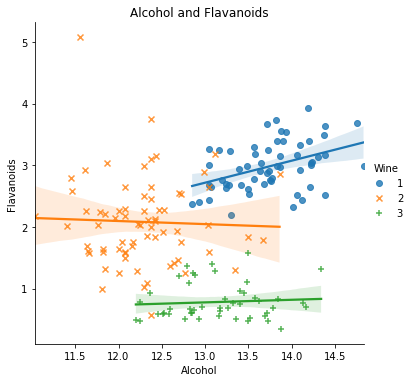

In [32]:
sns.lmplot('Alcohol', 'Flavanoids',
    data = wines, fit_reg = True,
    markers = ["o", "x", "+"],
    hue = "Wine")
plt.title('Alcohol and Flavanoids')

/Users/theodorenguyen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Alcohol and Proline')

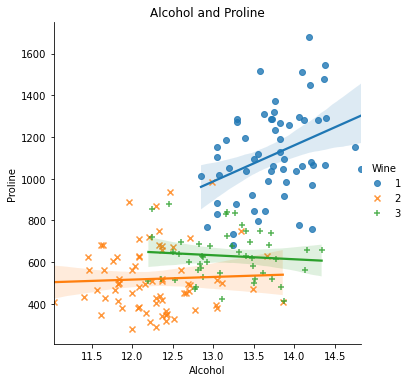

In [33]:
sns.lmplot('Alcohol', 'Proline',
    data = wines, fit_reg = True,
    markers = ["o", "x", "+"],
    hue = "Wine")
plt.title('Alcohol and Proline')

/Users/theodorenguyen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Alcohol and Color.int')

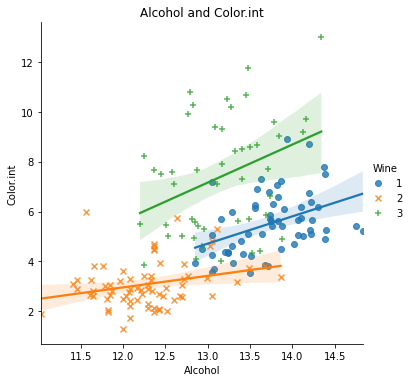

In [34]:
sns.lmplot('Alcohol', 'Color.int',
    data = wines, fit_reg = True,
    markers = ["o", "x", "+"],
    hue = "Wine")
plt.title('Alcohol and Color.int')

/Users/theodorenguyen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Flavanoids and Proline')

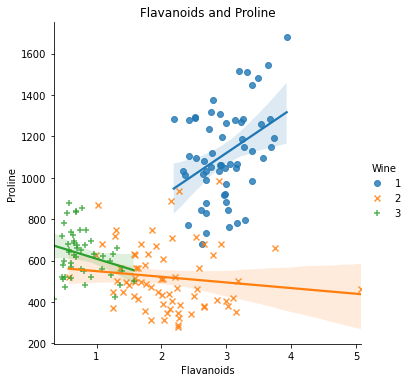

In [35]:
sns.lmplot('Flavanoids', 'Proline',
    data = wines, fit_reg = True,
    markers = ["o", "x", "+"],
    hue = "Wine")
plt.title('Flavanoids and Proline')

/Users/theodorenguyen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Flavanoids and Color.int')

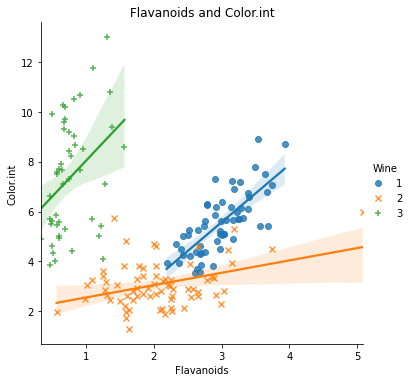

In [36]:
sns.lmplot('Flavanoids', 'Color.int',
    data = wines, fit_reg = True,
    markers = ["o", "x", "+"],
    hue = "Wine")
plt.title('Flavanoids and Color.int')

/Users/theodorenguyen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Proline and Color.int')

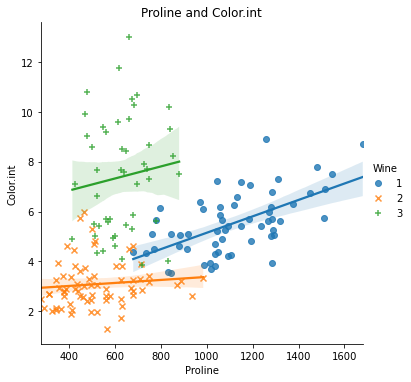

In [37]:
sns.lmplot('Proline', 'Color.int',
    data = wines, fit_reg = True,
    markers = ["o", "x", "+"],
    hue = "Wine")
plt.title('Proline and Color.int')

## (3) Train/Test Split

Data trimming:

In [38]:
wines.drop(['Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Nonflavanoid.phenols', 'Proanth', 'Hue', 'OD'], axis = 1, inplace = True)

In [39]:
wines.head()

,Wine,Alcohol,Flavanoids,Color.int,Proline
0,1,14.23,3.06,5.64,1065
1,1,13.20,2.76,4.38,1050
2,1,13.16,3.24,5.68,1185
3,1,14.37,3.49,7.80,1480
4,1,13.24,2.69,4.32,735


In [40]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(wines, test_size = 0.2)

print('train size: ', len(train))
print('test size: ', len(test))

train size:  142
test size:  36


## (4) Pickle

In [41]:
# Produce two .pkl files: wines_train.pkl and wines_test.pkl
import pickle

with open('wines_train.pkl', 'wb') as train_data:
    pickle.dump(train, train_data)

with open('wines_test.pkl', 'wb') as test_data:
    pickle.dump(test, test_data)

File names:
* wines_train.pkl
* wines_test.pkl

## (5) Number of $k$'s

In [42]:
# Open two .pkl files
with open ('wines_train.pkl', 'rb') as train_data:
    train = pickle.load(train_data)

with open('wines_test.pkl', 'rb') as test_data:
    test = pickle.load(test_data)

In [43]:
print('train size: ', len(train))
print('test size: ', len(test))

train size:  142
test size:  36


In [44]:
from sklearn.neighbors import KNeighborsClassifier

# find best k, range from 3 to half of the number of data
max_k = len(train) // 2
k_list = []
for i in range(3, max_k, 1):
    k_list.append(i)

print('max_k: ', max_k)
print('Generated ', len(k_list), ' k\'s')

max_k:  71
Generated  68  k's


## (6) Number of Cross Validation Scores

In [45]:
from sklearn.model_selection import cross_val_score

# Use the four features we selected in (2) (Alcohol, Flavanoids, Proline, Color.int).
# These are the predictor variables.
x_train = train[['Alcohol', 'Flavanoids', 'Proline', 'Color.int']]

# Our target variable is Wine (1, 2, or 3)
y_train = train['Wine']

In [46]:
# 10-fold cross validation

# Create list to store cv scores
cv_scores = []

# Set the best cross validation score to be negative infinity
best_score = -np.inf

for k in k_list:
    # k-Nearest Neighbor algorithm
    knn = KNeighborsClassifier(n_neighbors = k)
    # Store the average of 10 cross validation scores in cv_scores
    cv_scores.append(cross_val_score(knn, x_train, y_train, cv = 10, scoring = 'accuracy').mean())

    # If the most recent cv score is better than best_score,
    # reassign best_score and assign k to best_k
    if cv_scores[-1] > best_score:
        best_score = cv_scores[-1]
        best_k = k

print('Generated ', len(cv_scores), ' cross validation scores')

Generated  68  cross validation scores


## (7) Optimal Value of $k$

In [47]:
print('Best cross validation score: ', best_score)
print('Best k: ', best_k)

Best cross validation score:  0.7342857142857143
Best k:  26


[Text(0.5, 1.0, 'Best k: 26'),
 Text(0.5, 0, 'k (number of neighbors)'),
 Text(0, 0.5, 'Cross Validation Score')]

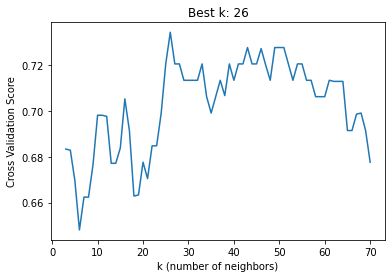

In [48]:
fig, ax = plt.subplots(1)
ax.plot(k_list, cv_scores)
ax.set(title = 'Best k: ' + str(best_k),
    xlabel = 'k (number of neighbors)',
    ylabel = 'Cross Validation Score')

## (8) Accuracy Score

In [49]:
from sklearn.metrics import accuracy_score

# knn with n_neighbors = best_k chosen from cross validation above
knn = KNeighborsClassifier(n_neighbors = best_k)

# set up knn using train data
knn.fit(x_train, y_train)

# select data features to be used for prediction on test data
x_test = test[['Alcohol', 'Flavanoids', 'Proline', 'Color.int']]
# select target value for test data
y_test = test['Wine']

# test
predictions = knn.predict(x_test)

# check ground truth with knn prediction
comparison = pd.DataFrame(
    {'prediction' : predictions, 
     'ground truth' : y_test}
)

comparison

,prediction,ground truth
110,3,2
137,2,3
131,2,3
17,1,1
109,3,2
162,3,3
89,3,2
117,2,2
104,3,2
39,3,1


In [50]:
# check accuracy
print('Accuracy is ' + str(accuracy_score(y_test, predictions)))

Accuracy is 0.7222222222222222
